In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

## Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

#import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
#import tensorflow_hub as hub 

## Data Collection

In [3]:
normal_path = "C:/Users/Mohammad Galib/Desktop/project/Brain Strock/Brain Strock/05 Code and Materials/dataset/Normal"
stroke_path = "C:/Users/Mohammad Galib/Desktop/project/Brain Strock/Brain Strock/05 Code and Materials/dataset/Stroke"

In [4]:
normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)

In [5]:
print("Images in Normal Data:",len(normal_folder))
print("Images in Stroke Data:",len(stroke_folder))

Images in Normal Data: 1551
Images in Stroke Data: 950


## Image Data Preprocessing 

In [6]:
normal_path = "C:/Users/Mohammad Galib/Desktop/project/Brain Strock/Brain Strock/05 Code and Materials/dataset/Normal"
stroke_path = "C:/Users/Mohammad Galib/Desktop/project/Brain Strock/Brain Strock/05 Code and Materials/dataset/Stroke"

data = []

for img_file in normal_folder:
    image = Image.open("C:/Users/Mohammad Galib/Desktop/project/Brain Strock/Brain Strock/05 Code and Materials/dataset/Normal/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
for img_file in stroke_folder:
    image = Image.open("C:/Users/Mohammad Galib/Desktop/project/Brain Strock/Brain Strock/05 Code and Materials/dataset/Stroke/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [7]:
len(data)

2501

In [8]:
data[0].shape

(224, 224, 3)

In [9]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [6, 6, 6],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 3, 3],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

## Class Labels

In [10]:
normal_label = [0]*len(normal_folder)
stroke_label = [1]*len(stroke_folder)

In [11]:
Target_label = normal_label + stroke_label

In [12]:
len(Target_label)

2501

## Convert Image data and target labels into array

In [13]:
x = np.array(data)
y = np.array(Target_label)

In [14]:
x[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [6, 6, 6],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 3, 3],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [15]:
y

array([0, 0, 0, ..., 1, 1, 1])

## Split The Data for training and testing purpose

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2250, 224, 224, 3)
(251, 224, 224, 3)
(2250,)
(251,)


## Image Data Visualization

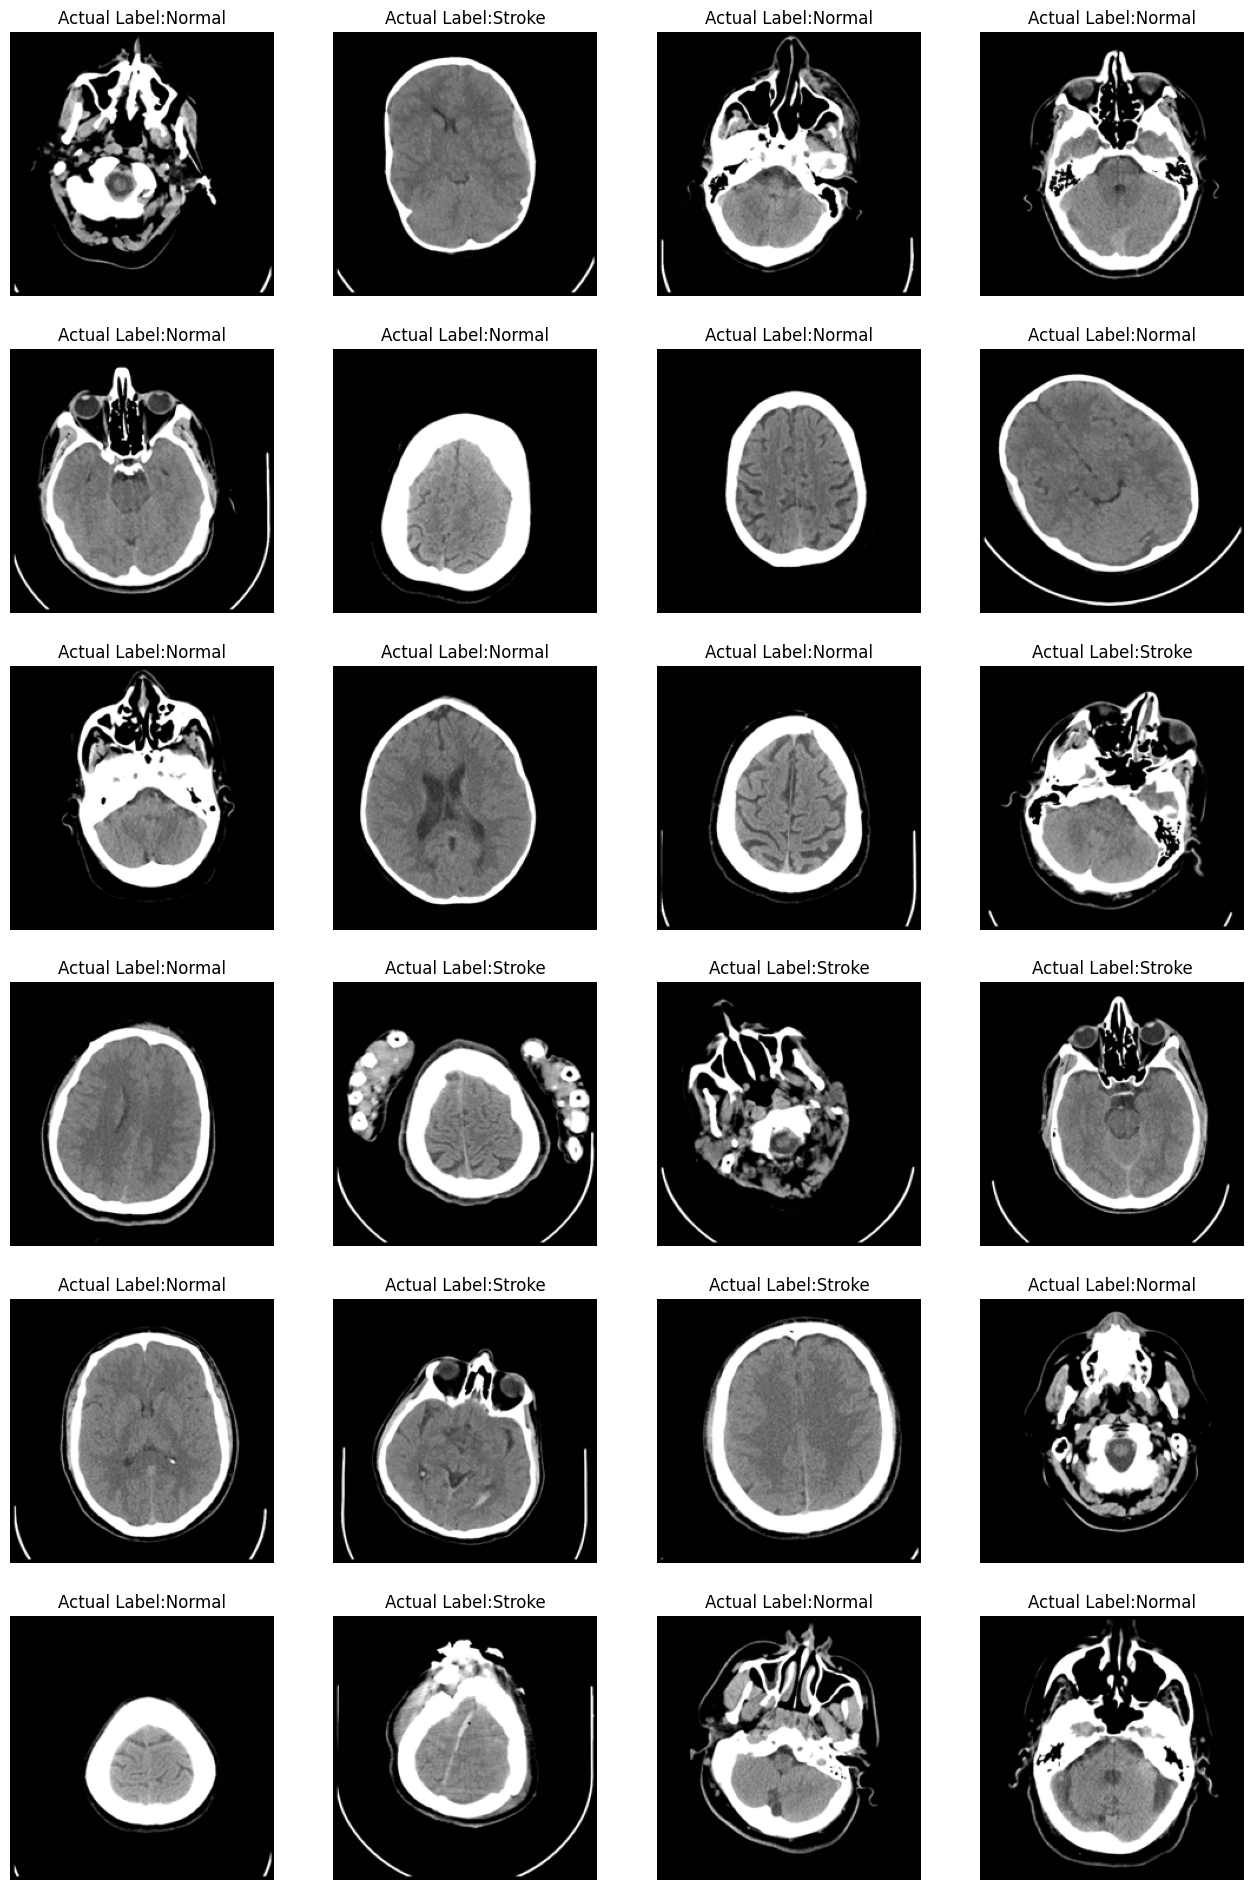

In [17]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,24))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Actual Label:{class_labels[y_train[i]]}")
    plt.axis("off")

## Create Model Using CNN

In [18]:
model = Sequential()

model.add(Conv2D(filters=100,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=80,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",
             metrics=["accuracy"])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 100)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 80)      72080     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 80)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        46144     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)      

In [19]:
history = model.fit(x_train,y_train,batch_size=32,
         epochs=10, validation_data=(x_test,y_test))

Epoch 1/10


64/71 [==========================>...] - ETA: 10s - loss: 7.8805 - accuracy: 0.6992

KeyboardInterrupt: 

## Model Evaluation on Test and Train Data

In [20]:
loss, acc = model.evaluate(x_test,y_test)
print("Loss on Test Data:",loss)
print("Accuracy on Test Data:",acc)

loss, acc = model.evaluate(x_train,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)

8/8 [==============================] - 3s 367ms/step - loss: 0.3144 - accuracy: 0.8685
Loss on Test Data: 0.3144074082374573
Accuracy on Test Data: 0.8685259222984314
 6/71 [=>............................] - ETA: 22s - loss: 0.2612 - accuracy: 0.9010

KeyboardInterrupt: 

## Predictions on Test Image Data

In [21]:
y_pred_test = model.predict(x_test)
y_pred_test_label = [1 if i>=0.5 else 0 for i in y_pred_test]

8/8 [==============================] - 3s 352ms/step


In [22]:
print("Actual Label:",y_test[:10])
print("Predicted Label:",y_pred_test_label[:10])

Actual Label: [0 0 0 0 1 1 0 1 1 0]
Predicted Label: [0, 1, 0, 0, 1, 1, 0, 1, 1, 0]


## Metrics Evaluation On Test Data

In [23]:
print()
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_test_label))
print()
print("Classification Report:\n",classification_report(y_test,y_pred_test_label))
print()
cnn_acc = round(accuracy_score(y_test, y_pred_test_label)*100, ndigits = 2)
print(f"\nThe Accuracy of Convolutional Neural Network is {cnn_acc} %")


Confusion Matrix:
 [[134  18]
 [ 15  84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       152
           1       0.82      0.85      0.84        99

    accuracy                           0.87       251
   macro avg       0.86      0.87      0.86       251
weighted avg       0.87      0.87      0.87       251



The Accuracy of Convolutional Neural Network is 86.85 %


## Image Predictions on Test Data

Error in callback <function _draw_all_if_interactive at 0x0000016051CB7EC0> (for post_execute):


KeyboardInterrupt: 

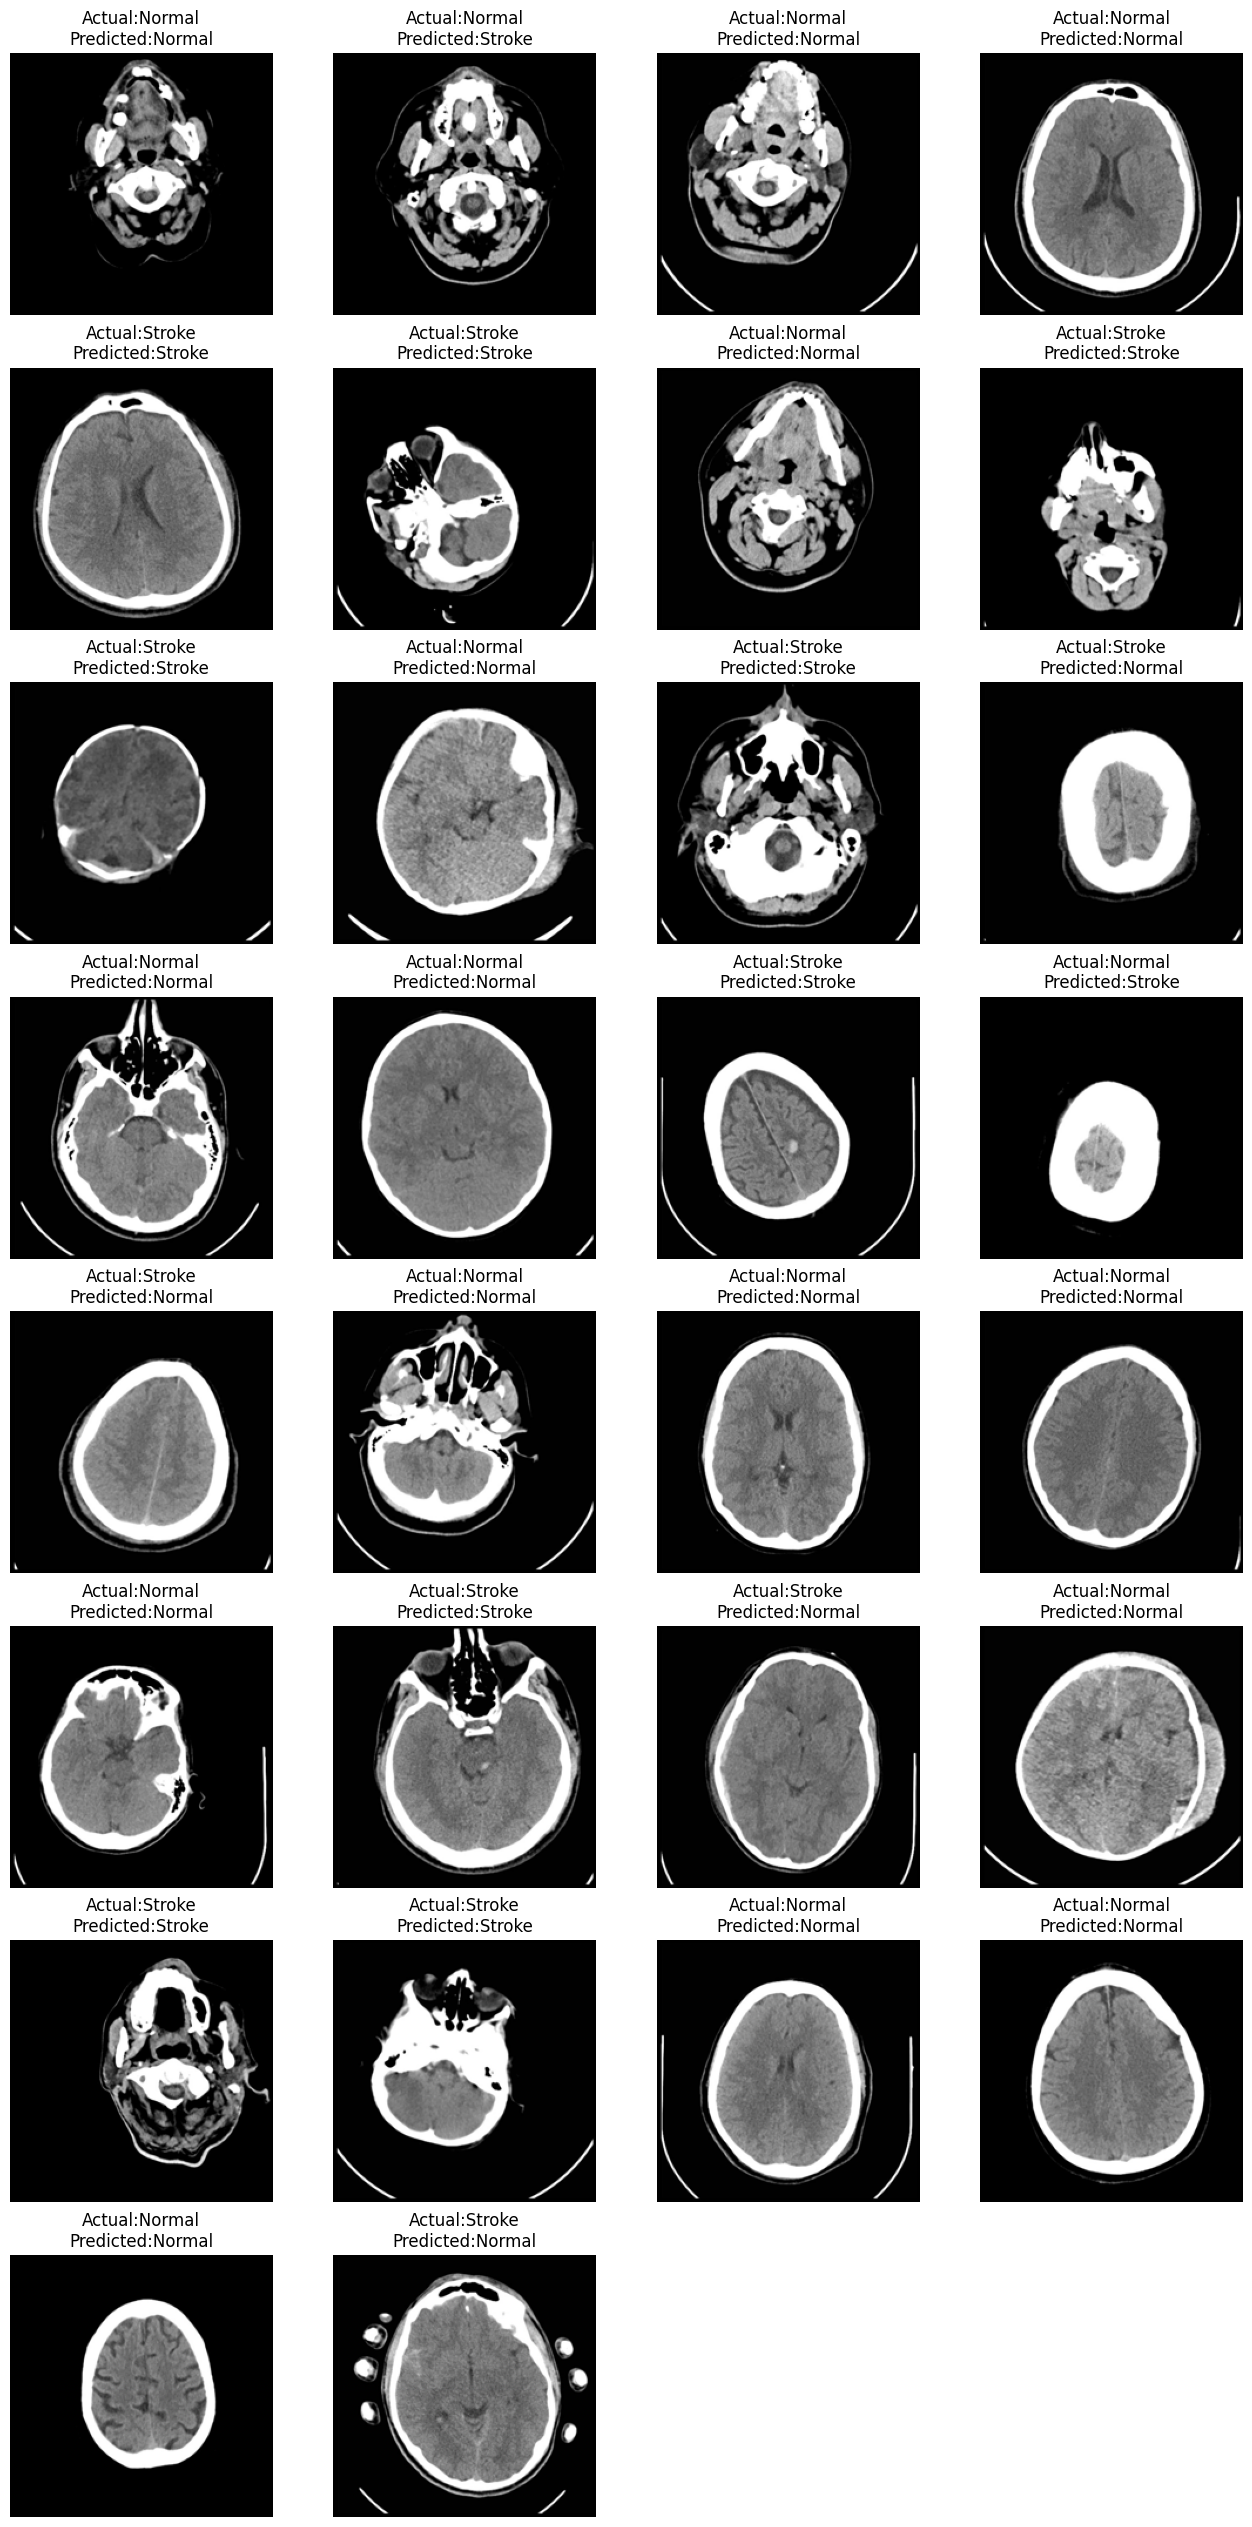

In [24]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,32))
for i in range(30):
    plt.subplot(8,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")